In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Dataset_clustering.csv')

In [3]:
df

,Name,Age,Salary
0,Robin,27,70000
1,Michael,29,90000
2,John,29,61000
3,Ivan,28,60000
4,Kevin,42,150000
5,Gary,39,155000
6,David,41,160000
7,Andrew,38,162000
8,Brandi,36,156000
9,Angelina,35,130000


### Plot scatterplot

Text(0, 0.5, 'Salary')

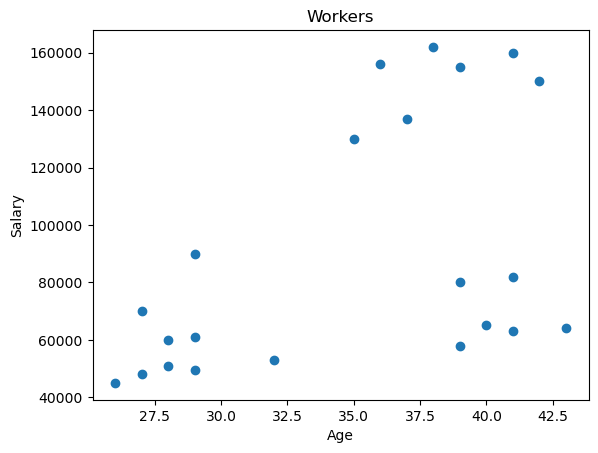

In [4]:
plt.scatter(df['Age'], df['Salary'])
plt.title('Workers')
plt.xlabel('Age')
plt.ylabel('Salary')

### Use K-means

In [5]:
km = KMeans(n_clusters = 3)

In [6]:
km

KMeans(n_clusters=3)

### Predict the data points using K means model

In [7]:
y_pred = km.fit_predict(df[['Age', 'Salary']])

C:\Users\kuan.yikjunn\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kuan.yikjunn\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [9]:
df['cluster'] = y_pred

In [10]:
df

,Name,Age,Salary,cluster
0,Robin,27,70000,0
1,Michael,29,90000,0
2,John,29,61000,2
3,Ivan,28,60000,2
4,Kevin,42,150000,1
5,Gary,39,155000,1
6,David,41,160000,1
7,Andrew,38,162000,1
8,Brandi,36,156000,1
9,Angelina,35,130000,1


### Plot cluster labels

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


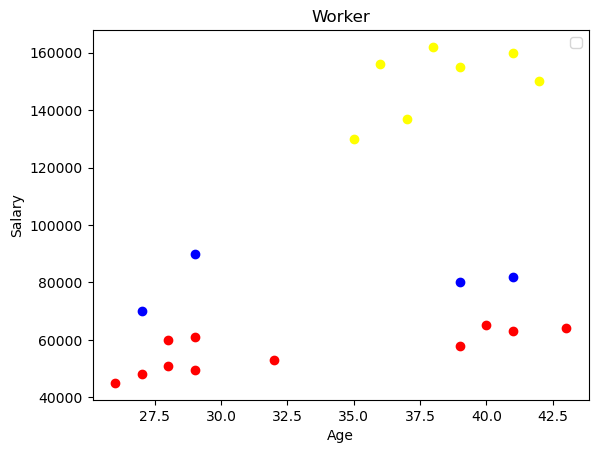

In [11]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['Age'], df1['Salary'], color = 'blue')
plt.scatter(df2['Age'], df2['Salary'], color = 'yellow')
plt.scatter(df3['Age'], df3['Salary'], color = 'red')

plt.title('Worker')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

### Use a scaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(df[['Salary']])
df['Salary'] = scaler.transform(df[['Salary']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [14]:
df

,Name,Age,Salary,cluster
0,Robin,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,John,0.176471,0.136752,2
3,Ivan,0.117647,0.128205,2
4,Kevin,0.941176,0.897436,1
5,Gary,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrew,0.705882,1.000000,1
8,Brandi,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


### Find the optimal K value using Elbow method

In [15]:
k_rng = range(1, 10)

sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Salary']])
    sse.append(km.inertia_)

C:\Users\kuan.yikjunn\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kuan.yikjunn\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kuan.yikjunn\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kuan.yikjunn\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

In [16]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.22395807059250128,
 0.1685851223602976,
 0.13949051988045866,
 0.10188787724979426]

### Plot Elbow Method based on SSE

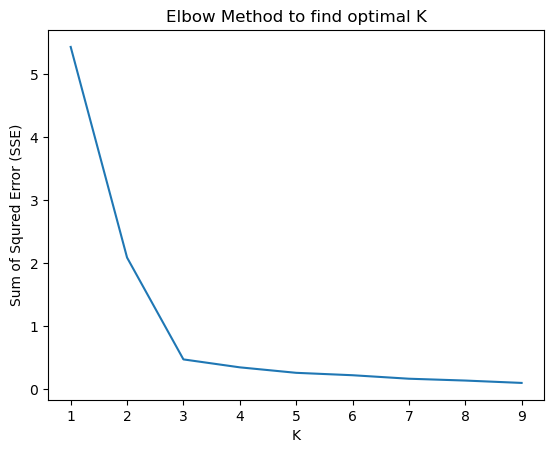

In [17]:
plt.title('Elbow Method to find optimal K')
plt.xlabel('K')
plt.ylabel('Sum of Squred Error (SSE)')
plt.plot(k_rng, sse)

In [18]:
km = KMeans(n_clusters = 3)

In [19]:
y_pred = km.fit_predict(df[['Age', 'Salary']])

C:\Users\kuan.yikjunn\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kuan.yikjunn\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [21]:
df['cluster'] = y_pred

In [22]:
df

,Name,Age,Salary,cluster
0,Robin,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,John,0.176471,0.136752,0
3,Ivan,0.117647,0.128205,0
4,Kevin,0.941176,0.897436,1
5,Gary,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrew,0.705882,1.000000,1
8,Brandi,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


### Centroid location

In [23]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

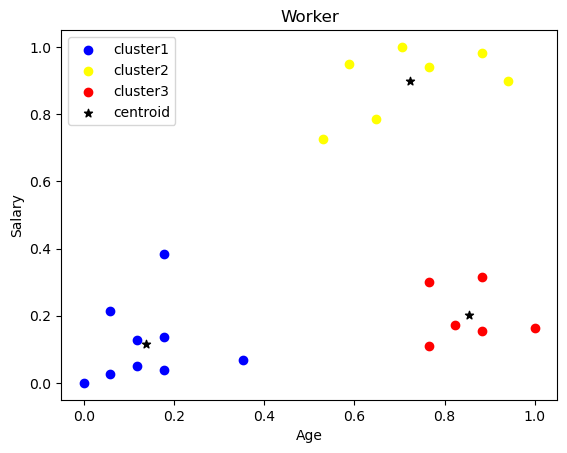

In [24]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1['Age'], df1['Salary'], color = 'blue', label = 'cluster1')
plt.scatter(df2['Age'], df2['Salary'], color = 'yellow', label = 'cluster2')
plt.scatter(df3['Age'], df3['Salary'], color = 'red', label = 'cluster3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'black', marker = '*', label = 'centroid')
plt.title('Worker')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()